In [5]:
import cv2,os

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [6]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception:',e)

In [7]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [8]:
np.save('data',data)
np.save('target',new_target)

In [9]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       2000      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [13]:
print(train_data.shape, test_data.shape)

(1238, 100, 100, 1) (138, 100, 100, 1)


In [14]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.5646

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 69s 2s/step - loss: 0.6896 - accuracy: 0.5646 - val_loss: 0.6069 - val_accuracy: 0.6532
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.5635 - accuracy: 0.7101

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 71s 2s/step - loss: 0.5635 - accuracy: 0.7101 - val_loss: 0.4307 - val_accuracy: 0.7944
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.3725 - accuracy: 0.8384

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 82s 3s/step - loss: 0.3725 - accuracy: 0.8384 - val_loss: 0.2754 - val_accuracy: 0.9032
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.2365 - accuracy: 0.9051

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 85s 3s/step - loss: 0.2365 - accuracy: 0.9051 - val_loss: 0.2274 - val_accuracy: 0.9153
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.1930 - accuracy: 0.9323

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 85s 3s/step - loss: 0.1930 - accuracy: 0.9323 - val_loss: 0.1628 - val_accuracy: 0.9556
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1460 - accuracy: 0.9525

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 81s 3s/step - loss: 0.1460 - accuracy: 0.9525 - val_loss: 0.1384 - val_accuracy: 0.9516
Epoch 7/20
31/31 [==============================] - 99s 3s/step - loss: 0.1028 - accuracy: 0.9727 - val_loss: 0.1400 - val_accuracy: 0.9435
Epoch 8/20
31/31 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9758

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


31/31 [==============================] - 110s 4s/step - loss: 0.0760 - accuracy: 0.9758 - val_loss: 0.1138 - val_accuracy: 0.9516
Epoch 9/20
31/31 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9818

INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


31/31 [==============================] - 140s 5s/step - loss: 0.0554 - accuracy: 0.9818 - val_loss: 0.1021 - val_accuracy: 0.9677
Epoch 10/20
31/31 [==============================] - 88s 3s/step - loss: 0.0455 - accuracy: 0.9848 - val_loss: 0.1131 - val_accuracy: 0.9516
Epoch 11/20
31/31 [==============================] - 84s 3s/step - loss: 0.0709 - accuracy: 0.9747 - val_loss: 0.1376 - val_accuracy: 0.9556
Epoch 12/20
31/31 [==============================] - 105s 3s/step - loss: 0.0326 - accuracy: 0.9909 - val_loss: 0.1672 - val_accuracy: 0.9355
Epoch 13/20
31/31 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.9808

INFO:tensorflow:Assets written to: model-013.model\assets


INFO:tensorflow:Assets written to: model-013.model\assets


31/31 [==============================] - 117s 4s/step - loss: 0.0516 - accuracy: 0.9808 - val_loss: 0.0907 - val_accuracy: 0.9758
Epoch 14/20
31/31 [==============================] - 94s 3s/step - loss: 0.0234 - accuracy: 0.9970 - val_loss: 0.0929 - val_accuracy: 0.9637
Epoch 15/20
31/31 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9899

INFO:tensorflow:Assets written to: model-015.model\assets


INFO:tensorflow:Assets written to: model-015.model\assets


31/31 [==============================] - 86s 3s/step - loss: 0.0262 - accuracy: 0.9899 - val_loss: 0.0882 - val_accuracy: 0.9637
Epoch 16/20
31/31 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9929

INFO:tensorflow:Assets written to: model-016.model\assets


INFO:tensorflow:Assets written to: model-016.model\assets


31/31 [==============================] - 97s 3s/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.0667 - val_accuracy: 0.9758
Epoch 17/20
31/31 [==============================] - 93s 3s/step - loss: 0.0242 - accuracy: 0.9939 - val_loss: 0.1279 - val_accuracy: 0.9516
Epoch 18/20
31/31 [==============================] - 101s 3s/step - loss: 0.0143 - accuracy: 0.9960 - val_loss: 0.0832 - val_accuracy: 0.9718
Epoch 19/20
31/31 [==============================] - 91s 3s/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.0914 - val_accuracy: 0.9718
Epoch 20/20
31/31 [==============================] - 77s 3s/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.1008 - val_accuracy: 0.9718


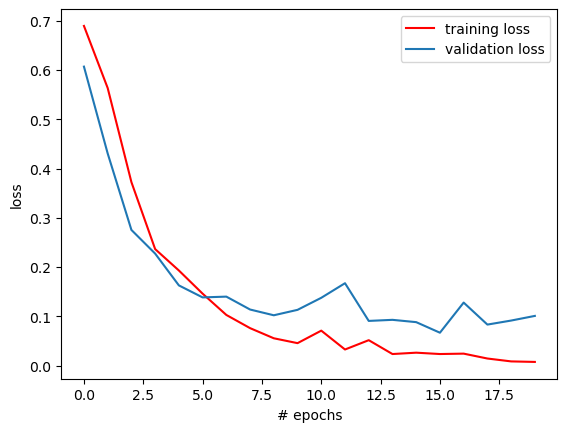

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

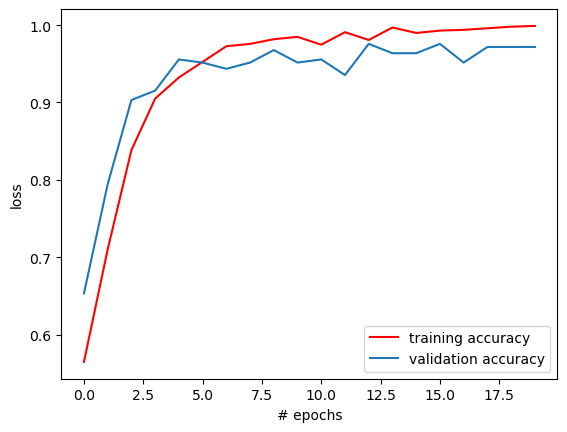

In [16]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 382ms/step - loss: 0.4711 - accuracy: 0.9203
[0.4711374342441559, 0.9202898740768433]


In [18]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model('model-017.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()